In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from numpy import linalg as LA

[0 0 8 1 4 5 0 9 0 6] [6 7 7 4 6 8 8 6 7 1]
ModeResult(mode=array([0]), count=array([4])) 2.5 3.3
(array([4, 1, 0, 0, 1, 1, 1, 0, 1, 1], dtype=int64), array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]))


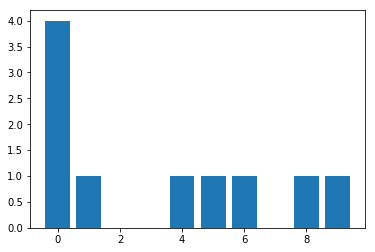

In [2]:
m = np.random.randint(10, size=10)
n = np.random.randint(10, size=10)
print(m,n)
print(stats.mode(m), np.median(m), np.mean(m))
print(np.histogram(m))
plt.bar(range(10),np.histogram(m)[0])
plt.show()

In [3]:
print(np.var(m), np.std(m))
print(stats.zscore(m))

11.41 3.3778691508109073
[-0.97694726 -0.97694726  1.39140973 -0.68090263  0.20723124  0.50327586
 -0.97694726  1.68745435 -0.97694726  0.79932048]


In [4]:
stats.pearsonr(m,n)

(-0.20723123624606793, 0.5656528374265075)

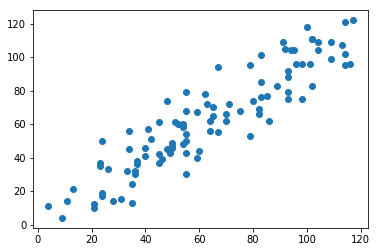

In [3]:
size = 100
x = np.zeros(size)
y = np.zeros(size)
for i in range(size):
    x[i] = np.random.randint(i*1, (i+30)*1)
    y[i] = np.random.randint(i*1, (i+30)*1)
#list(zip(x,y))

plt.scatter(x,y)
plt.show()

In [7]:
stats.pearsonr(x,y)[0]**2 # Quantos porcento a regressão explica melhor a variância de y em relação a x do que a média

0.8594878921299818

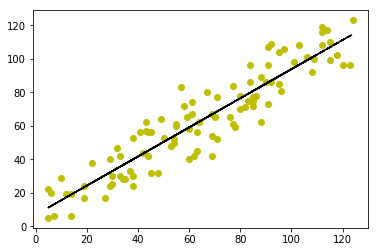

In [8]:
coefs = np.polyfit(x,y,1) # retorna coeficientes do polinomio ex: [1,2,3]
polinomio = np.poly1d(coefs) # retorna uma função de polinomio baseada nos coeficientes passados ex: x**2 + 2x + 3

plt.plot(x,y, 'yo', x, polinomio(x), '--k')

[  74.33634041 1685.15365959] [[-0.7152803  -0.69883767]
 [ 0.69883767 -0.7152803 ]]


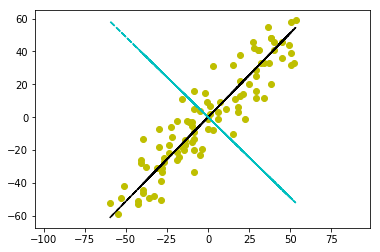

In [8]:
#PCA
x_adj = x - np.mean(x)
y_adj = y - np.mean(y)

#joined = np.concatenate((x,y), axis=0)
#joined = joined.reshape((2,size))
joined = np.vstack([x_adj, y_adj])

cov_matrix = np.cov(joined)
w, v = LA.eig(cov_matrix)
print(w,v)

plt.axis('equal')
plt.plot(x_adj, y_adj, 'yo', x_adj, (v[0][0]/v[0][1])*x_adj, '--k', x_adj, (v[1][0]/v[1][1])*x_adj, '--c')

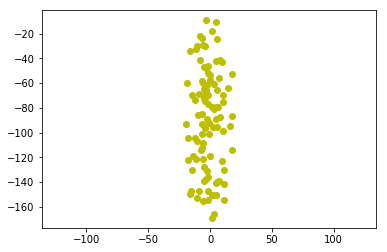

In [5]:
final_data = v.T.dot(joined)
plt.axis('equal')
plt.plot(final_data[0], final_data[1], 'yo')